--- 
Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Ying-Xuan Wu](https://github.com/amanda8412383)

# Replication of Duflo E, Dupas P, Ginn T, Barasa GM, Baraza M, Pouliquen V, et al. (2019) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Duflo E, Dupas P, Ginn T, Barasa GM, Baraza M, Pouliquen V, et al. (2019) HIV prevention among youth: A randomized controlled trial of voluntary counseling and testing for HIV and male condom distribution in rural Kenya

##### Downloading and viewing this notebook:

* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/HumanCapitalAnalysis/microeconometrics-course-project-amanda8412383). 

* Other viewing options like _MyBinder_ or _NBViewer_ .


* The original paper, as well as the data provided by the authors can be accessed [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CVOPZL).

##### Information about replication and individual contributions:

* Due to the unavailability of original code and the massiveness of the dataset, the estimations all differ from the original paper in various degrees.

* One of the most important outcome variable isn't found, the attempts on searching it is documented in section 7

* For the replication, I try to remain true to the original structure of the paper, all the panels and rows are lined as they appear in Duflo et al. (2019) and named identically.

* some of the columns feature in my replication appear as second-row indexes compared to the original tables, and the incidence rate has become independent to suit my workflow in Python.




<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Study-Design" data-toc-modified-id="2.-Study-Design-2">2. Study Design</a></span></li><li><span><a href="#3.-Identification-Problems" data-toc-modified-id="3.-Identification-Problems-3">3. Identification Problems</a></span></li><li><span><a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy-4">4. Empirical Strategy</a></span></li>
    <li><span><a href="#5.-Replication-of-Duflo-et-al.-(2019)" data-toc-modified-id="5.-Replication-of-Duflo-et-al.-(2019)-5">5. Replication of Duflo et al. (2019)</a></span><ul class="toc-item">
        <li><span><a href="#5.1.-Data-and-Primary-cleaning" data-toc-modified-id="5.1.-Data-and-Primary-cleaning-5.1">5.1. Data and Primary cleaning</a></span></li>
        <li><span><a href="#5.2.-Tables" data-toc-modified-id="5.2.-Tables-5.2">5.2. Tables</a></span><ul class="toc-item"><li>
            <span><a href="#5.2.1.-Table-1:-Summary-statistics-at-basline" data-toc-modified-id="5.2.1.-Table-1:-Summary-statistics-at-basline-5.2.1">5.2.1. Table 1: Summary statistics at basline</a></span></li><li><span><a href="#5.2.2.-Table-2:-Intention-to-treat-analysis" data-toc-modified-id="5.2.2.-Table-2:-Intention-to-treat-analysis-5.2.2">5.2.2. Table 2: Intention to treat analysis</a></span></li><li><span><a href="#5.2.3.-Table-3:-Effects-of-Intervention-on-other-outcomes" data-toc-modified-id="5.2.3.-Table-3:-Effects-of-Intervention-on-other-outcomes-5.2.3">5.2.3. Table 3: Effects of Intervention on other outcomes</a></span></li><li><span><a href="#5.2.4.-Table-4:-Heterogenetiy-test" data-toc-modified-id="5.2.4.-Table-4:-Heterogenetiy-test-5.2.4">5.2.4. Table 4: Heterogenetiy test</a></span></li></ul></li></ul></li>
    <li><span><a href="#6.-Discussion" data-toc-modified-id="6.-Discussion-6">6. Discussion</a></span></li>
    <li><span><a href="#7.-Debug:-HSV-2-at-baseline" data-toc-modified-id="7.-Debug:-HSV-2-at-baseline-7">7. Debug: HSV-2 at baseline</a></span><ul class="toc-item">
    <li><span><a href="#7.1.-Searching-dataset-and-verifying" data-toc-modified-id="7.1.-Searching-dataset-and-verifying-7.1">7.1 Searching dataset and verifying</a></span></li>
    <li><span><a href="#7.2.-Others" data-toc-modified-id="7.2.-Others-7.2">7.2 Others</a></span></li>
    </ul></li>
    <li><span><a href="#8.-References" data-toc-modified-id="8.-References-8">8. References</a></span></li></ul></div>

In [10]:
from auxiliary import *
from IPython.display import display
from IPython.display import Image
pd.options.display.max_rows = None

---
# 1. Introduction 
---

Duflo et al. (2019) examine the effects of Voluntary Counseling and Testing for HIV (VCT) and increasing access to male condoms compared to standard available HIV prevention services, using biological and behavioral outcomes, among youth in Western Kenya. VCT, serving as the entry to HIV treatment and care, is a test of accessing one’s HIV serostatus, in addition to receiving individualized risk-reduction counseling. VCT is supposed to help individuals reduce risky sexual behaviors and prevent themselves and their partners from HIV and other sexually transmitted infections such as Herpes Simplex Type 2 (HSV-2). Even though some of the previous studies show the reduction of risky sexual behavior in testing-positive individuals, other studies bring about the concern of disinhibition among those testing negative (Sherr et al. 2007). 

Through a four-arm, unblinded, individually randomized controlled trial implemented between 2009 and 2012 in four districts of Kenya’s Western Province, including samples of 10,245 youth aged 17 to 24 randomly assigned to receive community-based VCT, 150 male condoms, both VCT and condoms, or neither program, Duflo et al. (2019) examine the effect of these two interventions among the youth. The result suggests there are no statistically significant effects on the risk of HIV, or other behavioral or knowledge outcomes including self-reported pregnancy rates.

**Main variables** 

| **Interventions**      | **Main outcomes**       |
|------------------------|-------------------------|
| community-based VCT    | HIV                     |
| 150 male condoms       | HSV-2                   |
| both                   |                         |
| neither                |                         |

 
 

In this notebook, I attempt to replicate the results presented in the paper by Duflo et al. (2019) but only acquire similar result and failed to find one of the most important outcome variable.In section 2, the methodology adopted by Duflo et al. (2019) is presented, regarding how sampling, treatment, randomizing and tracking are conducted. In Section 3, possible identification is brought out from 3 different aspects, containing selection bias, measure error from self report, and externality. Section 4 briefly discusses the methodology used by the authors. Section 5 shows my replication of the results in the paper and discussion thereof.  Section 6 offers  discussion on insignificant results. Section 7 reveals my failing attemps on finding HSV-2 testing result at baseline.


---
# 2. Study Design
---

#### **Sample**

The samples are from a previous study of the authors ( Duflo, Dupas, and Krewer 2015) which is clustered randomized controlled trial regarding teacher HIV training program and distribution of free uniform, consisting of 19289 enrolled students in grade 6 of 328 schools in 2003. 55% of them, 10245 individuals are trackable during the first round tracking between March 2009 to July 2010. In total, they represent 85% of aged 17 - 24 in 2009 western Kenya. 

According to the criteria, the participants must :
1. Participated in the previous study, which implied at least attended grade 6
2. Residency in the study district
3. Provided informed consent 

#### **Randomizing** 
Stratification by gender, primary school, matriculation of secondary school in as from July 2007, ever pregnant as of 2007, randomly assigned to four arms, 25% each. 

#### **Treatment** 
There are standard VCT available to everyone at local health facilities, however, the intervention provided in the trial within community lowering travel time and cost, and social cost of visiting a HIV testing center. For the condom intervention arm, participants were provided 150 male condoms, they could take all or only of these condoms.

#### **Tracking**
Followed up survey is conducted from April 2011 to May 2013, if the respondent did not show up, field officers would track down the person. 25% of those whose acquittances providing contact information and 10% of those who can’t be contacted at all are randomly selected for further intensive tracking. Intensive tracking weight is included in the estimation.


---
# 3. Identification Problems
---
Considering Duflo et al. (2019) do not obtain any significant result, it might be more suitable to discuss possible identification problems in this section instead of identification. I am not trying to suggest obtaining significant result means problem-free, it just doesn’t seem meaningful to discuss how their identifications work in this case.

#### **casaul graph**
For a randomized control trial, it is expected to block all the back door part of unobservables and other controlled variable and obtain a clean casal effect. However, in this paper it's either fail to block backdoor path successfully or the treatments have no effect to it. I'll discuss some of the possible non-blocked backdoor part at later part of this section. In discussion, the possible correlations suggest by authors are listed.

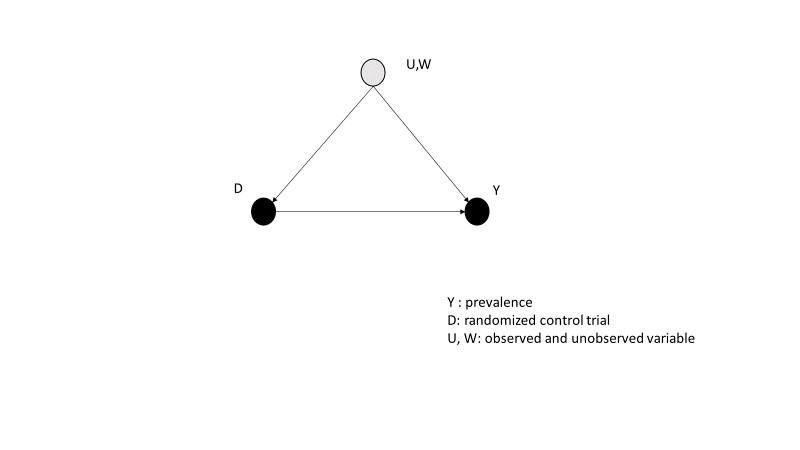

In [11]:
Image(filename='causal graph.jpg')

#### **Selection bias**
As a randomized control trial, this estimation is supposed to be free from selection bias. Nevertheless, in study design, Duflo et al. (2019) mention that the sample is based on its previous study which restricts the participants of this study to those who have attended at least 6 grade and accepting HIV related knowledges. Considering the following model from Greene (2006): 
\begin{equation}
yi = xi' \beta + ei\\
zi^* = wi' \gamma + ui\\
zi = 1(zi^* > c)
\end{equation}
Where $yi$ is our outcome variable. $xi$ is the treatment group. $zi$ is attending grade 6 or not. wi is are exogenous factors decided to attend 6 grade or not. $ei, ui$ are error terms.
Then we can rewrite the function into:
\begin{equation}
E(yi|wi, ui) = xi' \beta + E(ei|wi, ui)\\
 = xi' \beta + E(ei|ui)
\end{equation}
For $E(ei|ui)$ not equals to zero, we might obtain a biased estimator. And such an example is easily thinking of, for example, children from poverty background may be more likely to drop out, and higher chance to become sex worker, can't afford to buy condoms, missing sex education in class are all factors that could increase their chance of getting STI. 

In the latter discussion, the authors do not bring about this issue, but do admit lower external validity, while stressing as HIV prevention scaled up, increasing population would have access to prevention information.

#### **Measure error from self report**
Because of the behavioral outcomes are acquired through surveys, one common problem from self-reported is the imprecision of the data, possibly resulting from causes such as forgetfulness or deception. 
considering models from Hansen (2020):
\begin{equation}
yi = \beta xi^* + ui\\
\textrm{where} \quad E[ui|xi^*] = 0\\
xi = xi^* + vi
\end{equation}
Where $yi$ is one of our outcome variables, $xi$ is reported behavior, $ui$ is the error term, and vi are deviation originated from forgetfulness or deception.
rewritten the function as:
\begin{equation}
yi = \beta xi^* + ui\\
\textrm{where} \quad ei = -\beta vi + ui\\
\end{equation}
Then we can get the covariance of our treatment and residual is the variance of this reporting mistake. As we need $xi$ and residual to be independent.

But I would say measurement error has limited influence in this case. Only a few behavior problems serving as independent variables, for example ever pregnant and school enrollment in 2007 and is theoretically possible to do fact checks on these two variables. Most of the behavioral outcomes are serving as dependent variables in the logistic regression stated at section 4, in which case affect our estimation much lesser.



#### **Externalty**
One intriguing question to ask is whether these treatments induce externality, Miguel, Edward, and Kremer (2004) finds out in a randomized trial on 75 Kenya primary schools that medical treatment for intestinal helminths in the treatment group also reducing the transmission within the control group, even their randomized trial is taking place across schools. Using male condoms would undoubtedly reduce the possibility of infecting sex partners and thus contaminate the obtaining result. If the subject having any behavioral change after receiving VCT, it’ll also affect their sexual partners. Such an externality exists hinder us to detach treatment effects from the treatment group. I haven’t found any paper having empirical evidence on how would externality affecting HIV research, but some of the papers point this out and try to discuss the possible influence, such as Canning D. (2006).

---
<span style="color:orange">**NOTE**:</span> the  model used in this paper is logistic regression while I use linear notations in section 3 for simplicity. For nonlinear model, endogeneity and externality are still problems that affect large sample property of estimators which have an in-depth discussion in _A Logit Model With Endogenous Explanatory Variables and Network Externalities_ ( de Grange et al. 2015)

---
# 4. Empirical Strategy
---
the following listed methods are statistic analysis used In Duflo et al. (2019).

#### **Descriptive statistic**
For both baseline and phase 2, descriptive data is shown. Estimation in stage 2 takes into account of weighted follow-up rate. The share of the total sample and comparison among males and females is shown and a second analysis to test for heterogeneity in the result by gender, childbearing experience at baseline, and baseline belief of HIV infection likelihood.

#### **Incidence rate**
HSV-2 incidence was calculated by dividing respondents who were negative at baseline to new HSV-2 cases in each treatment arm by the total person-years of exposure. If the person remained negative, person-years of exposure is calculated as the total time from the baseline test to the follow-up. For the newly infected cases, it’s calculated as half the time between the baseline test and the positive test.

#### **Weighted logistic regression**
For estimating the effect of interventions on outcomes, the following logistic regression weighted by survey tracking strategy is run to compare outcomes in each treatment arm to the control, and the adjusted odds ratio and confidence interval are reported. Regressors are listed as follow:


|**regressors**          |                         
|------------------------|
| age group              |
| months between 2 surveys             |
| gender                               |
| secondary school enrollment in 2007  |
| ever pregnant by 2007  |
| treatment arm          |  



---
# 5. Replication of Duflo et al. (2019)
---

## 5.1. Data and Primary cleaning 


Duflo et al. (2019) use a data set with 2374 variables and 19293 participants. The following list concluding main sources of these variable. I prune the dataset because of even lft can't afford to upload original data set.

- answers, remarks of baseline questionnaire
- answers, remarks of phase 2 questionnaire
- school properties such as location, average scores of all students in KCPE
- testing results, both HSV-2 and HIV require multiple time of testing  
- poorly naming variable that might be created for analysis  


Even though the problem set has 19293 respondents, the number of total participants in this project is supposed to yield 7565, the rest are participants of the authors’ previous study. An important question would be how the authors filtering the data and ruling out problematic entries. Since neither the rules of excluding an entry nor how did they clean the data is mentioned in the essay. Besides, because of the majority data are from surveys, 92 variables are naming with "comments" describing the situation in the data collecting process. For example, in Log_comment there are entries describing as "mentally ill" or "duplicate" even though they are surveyed.  After trying all the combinations that seems reasonable to me, I filtered the data by 
1. having assigned to a treatment group
2. labeled as surveyed
3. labeled as tracked
4. discarded all the entries that have LOG_comments 
Through this, I gaining an approximate participation number. Unfortunately, this means all my statistics would be different in various degrees with the paper.



In [2]:
ind = df_filter.group.value_counts()
total = ind.sum()
print(ind)
print(f'total participant {total}')

Control           1889
VCT only          1866
Condom only       1855
Condom and VCT    1848
Name: group, dtype: int64
total participant 7458


##  5.2. Tables

### 5.2.1. Table 1: Summary statistics at basline

Table 1 shows baseline characteristics of man and woman across 4 trial arm. This table only includes individuals that have been surveyed at follow up. Because of lacking the original code, these variables are recreating myself. The below list describes the method I choose. This is the only table I forgo recreate percentage. As previously mentioned, the baseline HSV-2 result is nowhere to find, thus, second phase HSV-2 is used here.

| **Variables**          | **Method**              |
|------------------------|-------------------------|
| Number of individuals  | counting unique pupilid in each group   |
| Age                    | create dummy through variable "age2009" |
| Total year of schooling| create dummy through answer to "Q_b1_13_school_years"|
| HSV-2 positive         | using HSV-2 result of phase 2 instead   |
| Currently married      | people who have  "an_spouse_age"        |
| Ever or partner ever pregnant|people who have "evpreg07v2" (womwn only) or "Track_children_number" > 0 (both gender)|
| Ever had sex           | using "an_everhadsex"                   |
| Last sex used condom   | using answer of "Q_b4_127_last_sex_use_condom" |
| Ever had multiple partners| using "an_multiplepartners"          |
| Ever tested for HIV    | using "an_everHIVtested"                |
| Believed current HIV infection| using answer to "Q_b3_99"        |
| Believed future HIV infection | using answer to "Q_b3_100"       |
| Named 3 prevention      | from Dummies "an_Q_b3_80_how_prevent_hiv_1" to 19 has at least 3 of them being 1                         |
| Answered 3 questions    |"an_Q_b3_83", "an_Q_b3_84" negative & "an_Q_b3_88" being positive |
| Showed positive attitude|"an_Q_b3_112_agree_with_statement" is 1 & for question number 109 to 111 is 0|

3 HIV knowledge question is defined as follow by the author:
1. Can HIV be transmitted to a baby in the womb? (Q_b3_83)
2. Can HIV be transmitted to a baby during breastfeeding? (Q_b3_84)
3. Can HIV spread through mosquito bites? (Q_b3_88)


positive attitude is defined as follow by the author:
1. Agreed that people with HIV/AIDS should be treated the same as people without HIV/AIDS (an_Q_b3_112_agree_with_statement)
2. Disagreed that prostitutes or promiscuous men are responsible for spreading HIV("(an_Q_b3_110_agree_with_statement, an_Q_b3_111_agree_with_statement)
3. Disagreed that HIV was punishment for bad behavior (an_Q_b3_109_agree_with_statement)


In [10]:
#variables in table 1
varlist = ['Number of individuals', 'Age at baseline_<19', 'Age at baseline_19-20', 'Age at baseline_21-22', 'Age at baseline_>22',
          'Not enrolled in school', 
          'Total year of schooling_<10', 'Total year of schooling_10-11', 'Total year of schooling_12-13', 'Total year of schooling_>13',
          'HSV-2 positive', 'Currently married', 'Ever or partner ever pregnant', 'Ever had sex', 'Last sex used condom', 'Ever had multiple partners', 'Ever tested for HIV',
          'Believed current HIV infection', 'Believed future HIV infection', 
          'Named 3 prevention', 'Answered 3 questions', 'Showed positive attitude']
# table1(df_merge, varlist)

### 5.2.2. Table 2: Intention to treat analysis
This table shows HSV-2 and HIV outcomes across males and females. None of the intervention turns out to reduce the infection rate of any of these diseases significantly. Either adjusted odd ratio or weighted prevalence appears similar across interventions. 

For recreation, query & key was passed into the function to create panels for all and both gender. And also variables are passed in as a pair of (consonant, denominator) to calculate weighted percent.due to these variables are all recorded in different forms and hidden in the variable sea. Hence it requires searching it out, transforming, and passing it in manually. The replication does not contain HSV-2 at baseline, hence the incidence rate is also not in this table. Although HIV cases can be found in both stages, the infection case is too low to have a valid estimation.


| **Variables**          | **Method**              |
|------------------------|-------------------------|
| HSV-2                  | using "hsv2_positive"   |
| HIV                    | using answer of "p2_c2_233_hiv_result" |

In [9]:
query = ['', 'sex == "2 Female"', 'sex == "1 Male"']
keys=['all', 'female', 'male']
varlist2 = [('HSV-2 positive', 'hsv2_accept'), ('HIV', 'p2_c2_233_hiv_result')]

# Table(df_merge, query, keys, varlist2, option = 'T2')

 ### 5.2.3. Table 3: Effects of Intervention on other outcomes
In this table, some other behavioral outcome at phase 2 is analyzed across 4 treatment groups and by gender. For the treatment groups receiving condoms, "Ever received free condoms" and "Ever used the free condoms" are statistically significant comparing to the control or VCT treatment group. Similarly in the outcome "Ever had VCT", groups that have receive VCT are more significant comparing to the rest. While other variables, including childbearing, remains statistically insignificant.

| **Variables**               | **Method**              |
|-----------------------------|-------------------------|
| Ever received free condoms  | answer yes to "p2_b8_200_condomsfree_ever"    |
| Ever used the free condems  | answer 1 or 2 to "p2_b8_202_condfree_use"     |
| Ever sold/gave condoms      | answer 3 or 4  to "p2_b8_202_condfree_use"    |
| Ever had VCT                | answer yes to "p2_b9_204_evervct" |
| VCT more than once          | answer "p2_b9_205_timesvct" > 1   |
| VCT more than twice         | answer "p2_b9_205_timesvct" > 2   |
| Currently married p2        | answer currently married to "p2_b5_115_married"|
| Sex in last 6 months        | using "p2_b5_118_sexpartners_6mos" > 0 |
| Partner number last 6 months| using answer to "p2_b5_118_sexpartners_6mos"   |
| Partner number lifetime     | using answer of "p2_b5_119_sexpartners_life"   |
| Ever used condoms           | answer yes to "p2_b8_182_everusedcondom"       |
| Used condoms last time      | answer yes to "p2_b8_186_condom_lasttime"      |
| Unprotected sex non-monogamous| "p2_b5_119_sexpartners_life" > 1 & answer never to all of p2_b5_141 (using condoms with 3 most recent partner respectively)           |
| Self reported STI           | answer yes to "p2_b10_214_sti"       |
| Ever or partner ever pregnant p2| answer to "p2_b7_148_pregnancies_number" > 0|
| Named 3 prevention p2       | having more at least 3 answer in "p2_b4_72_protecthiv"|
| Answered 3 questions p2     | answer 1 to "p2_b4_74_hivinwomb", "p2_b4_75_hivbreastfeed" 2 to "p2_b4_76_hivmosquitoes" |
| Showed positive attitude p2 | answer 4 or 5 to "p2_b4_111_hivpunishment", "p2_b4_112_hivprostitutes", "p2_b4_113_hivpromiscuousmen" and 1 or 2 to "p2_b4_114_hivtreatedsame"|
| Child number p2             | using "p2_b7_148_pregnancies_number" |


In [8]:
varlist3 = [
            ("Ever received free condoms", "everfreecondoms_base"),
            ("Ever used the free condems", "everfreecondoms_base"),
            ('Ever sold/gave condoms', 'Ever received free condoms'),
            ('Ever had VCT', 'evervct_base'),
            ('VCT more than once', 'evervct_base'),
            ('VCT more than twice', 'evervct_base'),
            ('Currently married p2', 'currentmarried_base'),
            ('Sex in last 6 months', 'sexpartners6mon_base'), 
            ('Partner number last 6 months', None),
            ('Partner number lifetime', None),
            ('Ever used condoms', 'everusedcondom_base'),
            ('Used condoms last time', 'lasttimecondom_base'),
            ('Unprotected sex non-monogamous', 'polynocondom_base'),
            ('Self reported STI', 'sti_base'),
            ('Ever or partner ever pregnant p2', 'pregnant_base'),
            ('Named 3 prevention p2', 'named3prev_base'),
            ('Answered 3 questions p2', 'ans3q_base'),
            ('Showed positive attitude p2', 'posplhiv_base'), 
            ('Child number', None)]

# Table(df_t3, query, keys, varlist3)

### 5.2.4. Table 4: Heterogenetiy test
Table 4 presents heterogeneity tests on those who had started childbearing and those who hadn’t in the first 2 panels, and comparing those respondents believed they have been infected at baseline to those who don’t in the last 2 panels, to show the effect of interventions which yield no significant result as well.

| **Panels**                        | **Method**              |
|-----------------------------------|-------------------------|
| Started child bearing             | using "started_childbearing"          |
| Not started child bearing         | using "started_childbearing"   |
| Believed current HIV infection > 0| using  "Q_b3_99" (what is the likelihood (chance) that you are infected with HIV/AIDS now)|
| Believed current HIV infection = 0| using  "Q_b3_99" (what is the likelihood (chance) that you are infected with HIV/AIDS now)|



In [11]:
query4 = ['started_childbearing == 1', 'started_childbearing == 0', 'Q_b3_99 > 1', 'Q_b3_99 == 1']
keys4=['Started child bearing', 'Not started child bearing', 'Believed current HIV infection > 0', 'Believed current HIV infection = 0']
varlist4 = [('HSV-2 positive', 'hsv2_accept'), ('HSV-2 female', 'hsv2_accept_f'), ('HSV-2 male', 'hsv2_accept_m')]


# Table(df_t3, query4, keys4, varlist4)

---
# 6. Discussion 
---
Overall the analysis does not yield any significant result except for the condom related behavioral outcomes to groups receiving condoms and VCT related behavioral outcomes to groups having VCT. 

Duflo et al. (2019) providing two possible explanations from previous studies for the non-significant result.
1.	Most of the past research only find behavioral changes in people testing positive of HIV. In a meta-analysis (Fonner 2012 et al.) summing up 17 studies, it appears that no significant changes in STI or HIV prevalence rate of those receiving VCT. However, to who being test positive for HIV, there is a reduction in sex partners and an increase in condom use. This cannot be assessed in our data due to overly low HIV prevalence.

2.	The age group. Another multi-component HIV prevention program conducted in Africa and Thailand suggests there is a significant reduction among older women, but no effect among ages 18 to 24 (Coates 2014 et al.). In this study, the subjects are between 17 to 24, which is consistent with their finding.
3.	There were several large scale HIV testing events in the area. At baseline, 44% of the control group had been tested for HIV, while 82.4% had been tested at follow up. The high participation rate is likely to interfere and weaken the effect of treatments.

I have considered changing paper because my replication process doesn’t feel like having closed connections to the course contents and the fact I failed to find HSV-2 at baseline. But I didn’t, subjecting to sunk cost fallacy.


---
# 7. Debug: HSV-2 at baseline
---
This section document all my failing attempts on searching for variable represent HSV-2 testing result at baseline.


## 7.1. Searching dataset and verifying

In [13]:
hsv = df_filter.filter(regex='.*(?i)hsv.*',axis=1)
hsv.head()

,hsv2id,merge_HSVcode,HSV_result1,HSV_od1,HSV_result2,HSV_od2,HSV_result3,HSV_od3,HSV_result4,HSV_od4,HSV_finalresult,HSV_batch,merge_HSVresults,hsv2_positive,HSV2_blood_sample,hsv2_decline,hsv2_accept,HSV-2 positive
1,546864.0,3.0,Negative,NaN,,NaN,,NaN,,NaN,Negative,1.0,3.0,0.0,1.0,0.0,1.0,0
2,378855.0,3.0,Negative,NaN,,NaN,,NaN,,NaN,Negative,1.0,3.0,0.0,1.0,0.0,1.0,0
3,579082.0,3.0,Negative,NaN,,NaN,,NaN,,NaN,Negative,1.0,3.0,0.0,1.0,0.0,1.0,0
4,775833.0,3.0,Positive,NaN,Positive,2.533,,NaN,,NaN,Positive,1.0,3.0,1.0,1.0,0.0,1.0,1
5,696069.0,3.0,Negative,NaN,,NaN,,NaN,,NaN,Negative,1.0,3.0,0.0,1.0,0.0,1.0,0


First, rule out variables that are obviously irrelevant.
- **hsv2id** is assigned to almost all individuals in the data set 19202 out of 19293 regardless of having HSV-2 result at stage 2 or not. Here, in the filtered data frame total number equals 7458 as the surveyed individuals that are filtered out previously.
- **merge_HSVcode** seems to be some sort of merging key generated in data processing process of the authors, having only value 3.
- **HSV_od1** to **HSV_od4** are supposed to be the numerical value records of some special cases in the testing process. It takes values that range from 0 to about 5, only have value if HSV_result is not null.
- **HSV_batch** something takes value from 1 to 8, I assume it relates to testing branches.
- **merge_HSVresults** taking value 1 & 3 with 144 & 7313 entries each, it supposed to be something related to merge_HSVcode
- **HSV2_blood_sample**, **hsv2_decline**, **hsv2_accept** could be gauged by the number of entries and name that denoted taking hsv2 blood sample or not, accepting testing or not, declining test or not.
- **HSV-2 positive** is variable I created for table 2 based on hsv-positive

As for HSV_result1 to HSV_result4, HSV_finalresult, hsv2_positive, it can be seemn from below, HSV_finalresult is the same thing as hsv-positive.

In [14]:
pd.crosstab(hsv['hsv2_positive'], hsv['HSV_finalresult'])

HSV_finalresult,Equivocal,Negative,Positive
hsv2_positive,,,
0.0,31,6674,0
1.0,0,0,597


As for the 4 HSV_result, if counting how many non-null values in each column, it will appear to be declined sharply.

In [49]:
hsv_results = hsv.filter(regex='HSV_result.',axis=1)
hsv_results[hsv_results != ''].count()

HSV_result1    7314
HSV_result2     763
HSV_result3     145
HSV_result4      14
dtype: int64

If comparing the only one testing that is covered almost the whole sample with the final result, it’ll show those who have been testing negative in HSV_result1 are all considered as negative in the final result. This explains that it can’t be testing at baseline because it suggests there is no new infections and is inconsistent with the number in Duflo et al. (2019). Combing these two characteristics and existence of HSV_od1 to 4, I’ll say these are just variables recording repeated testing results for the follow-up test.

In [50]:
pd.crosstab(hsv['HSV_result1'], hsv['HSV_finalresult'])

HSV_finalresult,,Equivocal,Negative,Positive
HSV_result1,,,,
,144,0,0,0
Equivocal,0,21,54,27
Negative,0,0,6555,0
Positive,0,22,65,570


## 7.2. Others

Here is a list of the rest of my attempts because showing them all would look tedious.
- Using self-reported STI, an_STI_Q205 to compose the HSV-2 prevalence at baseline, sadly, it doesn’t yield anything closed to the value reported in Duflo et al. (2019) and is not the same as how the paper described as well. In the paper, it mentioned about blood testing, instead of self-reporting as the source of HSV-2 infection.
- Doing the searching and verifying process in 7.1 on keywords: ‘bd’, ‘blood’, ‘test’, ‘result’  etc.
- Checking both questionnaires about whether they have HSV results  
- Poring over the whole dataset and testing any variable that having a name can possibly be it.

The only possible solution that’s left is writing to the author and ask about it. Considering of time they’ll take to reply might exceed project deadline and inappropriateness, I didn’t give this thought a shot.


---
# 8. References
---

* **Canning D. (2006)** _The economics of HIV/AIDS in low-income countries: the case for prevention. J Econ Perspect._ 20(3):121-142. doi:10.1257/jep.20.3.121

* **Coates TJ, Kulich M, Celentano DD, Zelaya CE, Chariyalertsak S, Chingono A, et al. (2014)** _Effect of community-based voluntary counselling and testing on HIV incidence and social and behavioural outcomes (NIMH Project Accept; HPTN 043): a cluster-randomised trial._ Lancet Global Health. 2(5): E267–77. https://doi.org/10.1016/S2214-109X(14)70032-4 PMID: 25103167

* **de Grange, L., González, F., Vargas, I. et al. (2015)** _A Logit Model With Endogenous Explanatory Variables and Network Externalities._ Netw Spat Econ 15, 89–116. https://doi.org/10.1007/s11067-014-9271-5

* **Duflo E, Dupas P, Ginn T, Barasa GM, Baraza M, Pouliquen V, et al. (2019)** _HIV prevention among youth: A randomized controlled trial of voluntary counseling and testing for HIV and male condom distribution in rural Kenya._ PLoS ONE 14(7): e0219535. https://doi.org/10.1371/journal.pone.0219535

* **Duflo E, Dupas P, Kremer M. (2015)** _Education, HIV, and Early Fertility: Experimental Evidence from Kenya. American Economic Review._ 105(9):2257–97.

* **Fonner VA, Denison J, Kennedy CE, O’Reilly K, Sweat M. (2012)** _Voluntary counseling and testing (VCT) for changing HIV-related risk behavior in developing countries._ The Cochrane Library. https://doi.org/10.1002/14651858.CD010274

* **Greene (2006)** _Econometric Analysis_

* **Hansen B. (2020)** _Econometrics_

* **Miguel, Edward, and Michael Kremer. (2004)** _Worms: Identifying Impacts on Education and Health in the Presence of Treatment Externalities._ Econometrica 72 (1): 159-217.

* **Sherr L, Lopman B, Kakowa M, Dube S, Chawira G, Nyamukapa C, et al. (2007)** _Voluntary counselling and testing: uptake, impact on sexual behaviour, and HIV incidence in a rural Zimbabwean cohort. AIDS._ 21(7):851–86 https://doi.org/10.1097/QAD.0b013e32805e8711 PMID: 17415040



-------
Notebook by Amanda Wu | Find me on GitHub at https://github.com/amanda8412383

---